In [3]:
# for the CNN
import numpy as np
import tensorflow.keras
import matplotlib.pyplot as plt
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv1D, MaxPooling1D, AveragePooling1D

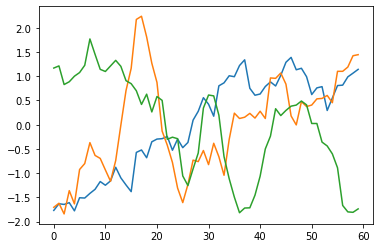

10000 8000 2000 60


In [4]:
str0 = 'ts_L60_Z12_A500_DX50_bias5_N10000'
fnamex = 'DATA/x_' + str0 + '.csv'
fnamey = 'DATA/y_' + str0 + '.csv'

x = np.loadtxt(fnamex, delimiter = ',' ,dtype = float)
N = len(x)

# comment this part the first time
# without this the model is terrible
xm = x.mean(axis=1) # mean of each row
for n in range(N):
    x[n] = x[n] - xm[n] # we are shifted in the center, we are removing the mean
    
xstd = x.std(axis = 1) # standard deviation
for n in range(N):
    x[n] = x[n] / xstd[n]
    
    #now our data are whitin units

plt.plot(x[0])
plt.plot(x[1])
plt.plot(x[2])
plt.show()

categ = np.loadtxt(fnamey ,delimiter = ',', dtype = int)
N_categ = 3
y = np.zeros((N,N_categ))

for n in range(N):
    y[n][categ[n]] = 1.

perc_train = 0.8
N_train = int(N*perc_train)
N_val = N - N_train
x_train = x[:N_train]
y_train = y[:N_train]
x_val = x[N_train:]
y_val = y[N_train:]

L = len(x[0])
print(N, N_train, N_val, L)

### DATA reshaping

In [5]:
print('shape before: ',x_train.shape)
x_train = x_train.reshape(x_train.shape[0],L,1)
print('shape after: ',x_train.shape)
x_val = x_val.reshape(x_val.shape[0],L,1)
input_shape = (L,1)

shape before:  (8000, 60)
shape after:  (8000, 60, 1)


### Convolutional NN

In [6]:
from tensorflow.keras import initializers, regularizers

reg = regularizers.l1(0.1)
np.random.seed(12345)
ini = initializers.RandomNormal(mean = 0, stddev = 0.05)

model = Sequential()
model.add(Conv1D( filters = 5, kernel_size = 11,
                 kernel_regularizer = reg,
                 kernel_initializer = ini,
                 activation = 'relu',
                 input_shape = input_shape
                ))
model.add(AveragePooling1D(5))
model.add(Conv1D(filters = 5, kernel_size = 7, activation = 'relu'))
model.add(Flatten())
model.add(Dense(10, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(N_categ, activation = 'softmax' ))

print(model.summary())

from tensorflow.keras import optimizers

opt = optimizers.SGD(lr = 0.01, momentum = 0.9, nesterov = True, decay = 1e-6)

model.compile(loss = keras.losses.categorical_crossentropy,
             optimizer = 'adam', metrics = ['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 50, 5)             60        
_________________________________________________________________
average_pooling1d (AveragePo (None, 10, 5)             0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 4, 5)              180       
_________________________________________________________________
flatten (Flatten)            (None, 20)                0         
_________________________________________________________________
dense (Dense)                (None, 10)                210       
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 3

After the shifting of the data, our model is working. 30 epochs are not enought

In [7]:
batch_size = 250
epochs = 250

fit = model.fit(x_train, y_train,
               batch_size = batch_size, epochs = epochs,
               validation_data = (x_val, y_val),
               verbose = 2, shuffle = True)

Train on 8000 samples, validate on 2000 samples
Epoch 1/250
8000/8000 - 4s - loss: 1.2524 - accuracy: 0.3535 - val_loss: 1.1915 - val_accuracy: 0.3675
Epoch 2/250
8000/8000 - 0s - loss: 1.1564 - accuracy: 0.3652 - val_loss: 1.1251 - val_accuracy: 0.3775
Epoch 3/250
8000/8000 - 0s - loss: 1.1106 - accuracy: 0.3519 - val_loss: 1.1030 - val_accuracy: 0.3475
Epoch 4/250
8000/8000 - 0s - loss: 1.1006 - accuracy: 0.3236 - val_loss: 1.0995 - val_accuracy: 0.3335
Epoch 5/250
8000/8000 - 0s - loss: 1.0994 - accuracy: 0.3377 - val_loss: 1.0994 - val_accuracy: 0.3335
Epoch 6/250
8000/8000 - 0s - loss: 1.0994 - accuracy: 0.3321 - val_loss: 1.0994 - val_accuracy: 0.3335
Epoch 7/250
8000/8000 - 0s - loss: 1.0994 - accuracy: 0.3257 - val_loss: 1.0993 - val_accuracy: 0.3650
Epoch 8/250
8000/8000 - 0s - loss: 1.0993 - accuracy: 0.3391 - val_loss: 1.0993 - val_accuracy: 0.3335
Epoch 9/250
8000/8000 - 0s - loss: 1.0995 - accuracy: 0.3256 - val_loss: 1.0993 - val_accuracy: 0.3660
Epoch 10/250
8000/8000 - 

Epoch 80/250
8000/8000 - 0s - loss: 1.0993 - accuracy: 0.3298 - val_loss: 1.0993 - val_accuracy: 0.3335
Epoch 81/250
8000/8000 - 0s - loss: 1.0993 - accuracy: 0.3295 - val_loss: 1.0993 - val_accuracy: 0.3335
Epoch 82/250
8000/8000 - 0s - loss: 1.0993 - accuracy: 0.3351 - val_loss: 1.0993 - val_accuracy: 0.3330
Epoch 83/250
8000/8000 - 0s - loss: 1.0993 - accuracy: 0.3340 - val_loss: 1.0993 - val_accuracy: 0.3335
Epoch 84/250
8000/8000 - 0s - loss: 1.0993 - accuracy: 0.3332 - val_loss: 1.0992 - val_accuracy: 0.3335
Epoch 85/250
8000/8000 - 0s - loss: 1.0993 - accuracy: 0.3302 - val_loss: 1.0994 - val_accuracy: 0.3335
Epoch 86/250
8000/8000 - 0s - loss: 1.0993 - accuracy: 0.3321 - val_loss: 1.0994 - val_accuracy: 0.3335
Epoch 87/250
8000/8000 - 0s - loss: 1.0993 - accuracy: 0.3336 - val_loss: 1.0992 - val_accuracy: 0.3330
Epoch 88/250
8000/8000 - 0s - loss: 1.0993 - accuracy: 0.3294 - val_loss: 1.0992 - val_accuracy: 0.3330
Epoch 89/250
8000/8000 - 0s - loss: 1.0993 - accuracy: 0.3331 - 

Epoch 159/250
8000/8000 - 0s - loss: 1.0993 - accuracy: 0.3330 - val_loss: 1.0994 - val_accuracy: 0.3335
Epoch 160/250
8000/8000 - 0s - loss: 1.0993 - accuracy: 0.3275 - val_loss: 1.0993 - val_accuracy: 0.3335
Epoch 161/250
8000/8000 - 0s - loss: 1.0993 - accuracy: 0.3332 - val_loss: 1.0993 - val_accuracy: 0.3335
Epoch 162/250
8000/8000 - 0s - loss: 1.0993 - accuracy: 0.3332 - val_loss: 1.0992 - val_accuracy: 0.3335
Epoch 163/250
8000/8000 - 0s - loss: 1.0993 - accuracy: 0.3246 - val_loss: 1.0993 - val_accuracy: 0.3335
Epoch 164/250
8000/8000 - 0s - loss: 1.0993 - accuracy: 0.3273 - val_loss: 1.0992 - val_accuracy: 0.3330
Epoch 165/250
8000/8000 - 0s - loss: 1.0993 - accuracy: 0.3275 - val_loss: 1.0992 - val_accuracy: 0.3335
Epoch 166/250
8000/8000 - 0s - loss: 1.0993 - accuracy: 0.3252 - val_loss: 1.0993 - val_accuracy: 0.3335
Epoch 167/250
8000/8000 - 0s - loss: 1.0993 - accuracy: 0.3259 - val_loss: 1.0993 - val_accuracy: 0.3335
Epoch 168/250
8000/8000 - 0s - loss: 1.0993 - accuracy:

8000/8000 - 0s - loss: 1.0993 - accuracy: 0.3334 - val_loss: 1.0992 - val_accuracy: 0.3330
Epoch 238/250
8000/8000 - 0s - loss: 1.0993 - accuracy: 0.3269 - val_loss: 1.0993 - val_accuracy: 0.3330
Epoch 239/250
8000/8000 - 0s - loss: 1.0993 - accuracy: 0.3220 - val_loss: 1.0992 - val_accuracy: 0.3330
Epoch 240/250
8000/8000 - 0s - loss: 1.0993 - accuracy: 0.3334 - val_loss: 1.0993 - val_accuracy: 0.3330
Epoch 241/250
8000/8000 - 0s - loss: 1.0993 - accuracy: 0.3334 - val_loss: 1.0991 - val_accuracy: 0.3330
Epoch 242/250
8000/8000 - 0s - loss: 1.0993 - accuracy: 0.3257 - val_loss: 1.0992 - val_accuracy: 0.3335
Epoch 243/250
8000/8000 - 0s - loss: 1.0993 - accuracy: 0.3209 - val_loss: 1.0992 - val_accuracy: 0.3335
Epoch 244/250
8000/8000 - 0s - loss: 1.0993 - accuracy: 0.3239 - val_loss: 1.0993 - val_accuracy: 0.3330
Epoch 245/250
8000/8000 - 0s - loss: 1.0993 - accuracy: 0.3301 - val_loss: 1.0993 - val_accuracy: 0.3335
Epoch 246/250
8000/8000 - 0s - loss: 1.0993 - accuracy: 0.3229 - val_

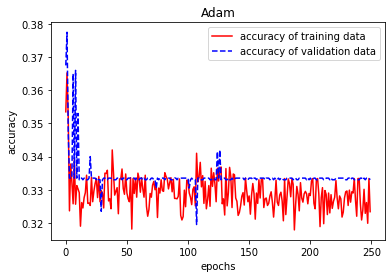

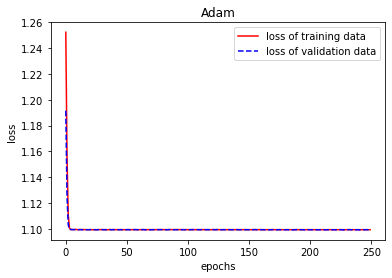

In [8]:
for obs in ('accuracy', 'loss'):
    plt.figure(figsize = (6,4))
    plt.plot(fit.history[obs], 'r', label = obs +' of training data')
    
    plt.plot(fit.history['val_' + obs], 'b--', label = obs + ' of validation data')
    plt.title('Adam')
    plt.ylabel(obs)
    plt.xlabel('epochs')
    plt.legend()
    plt.show()

In [9]:
print(keras.__version__)
print(tensorflow.__version__)

2.3.1
2.1.0
